# 전국 신규 민간 아파트 분양가격 동향
* 2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.

## 다루는 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 데이터셋
* 다운로드 위치 : https://www.data.go.kr/dataset/3035522/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

### 주택도시보증공사_전국 평균 분양가격(2019년 12월)
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [1]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러옵니다.
import pandas as pd

## 데이터 로드

### 최근 파일 로드

* 공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러옵니다. 이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않습니다. 보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있습니다. df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드합니다.

* 데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력합니다.

In [2]:
# 최근 분양가 파일을 로드해서 df_last 라는 변수에 담습니다.
df_last = pd.read_csv("data/주택도시보증공사_전국 평균 분양가격(2020년 2월).csv",encoding="cp949")
df_last.shape

(4505, 5)

In [3]:
# head 로 파일을 미리보기 합니다.
# 메소드 뒤에 ?를 하면 자기호출 이라는 기능을 통해 메소드의 docstring을 출력합니다.
# 메소드의 ()괄호 안에서 Shift + Tab키를 눌러도 같은 문서를 열어볼 수 있습니다.
# Shift + Tab + Tab 을 하게 되면 팝업창을 키울 수 있습니다.

df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [4]:
# tail 로도 미리보기를 합니다.

df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4500,제주,전체,2020,2,3955
4501,제주,전용면적 60㎡이하,2020,2,4039
4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962
4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,NaN
4504,제주,전용면적 102㎡초과,2020,2,3601


### 2015년 부터 최근까지의 데이터 로드

In [5]:
# 해당되는 폴더 혹은 경로의 파일 목록을 출력해 줍니다.

%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: F44C-CBDA

 C:\Users\LG\Documents\GitHub\Data_Analysis\data 디렉터리

2020-04-30  오후 03:33    <DIR>          .
2020-04-30  오후 03:33    <DIR>          ..
2020-04-30  오후 03:27           168,798 주택도시보증공사_전국 평균 분양가격(2020년 2월).csv
2020-04-30  오후 03:33             2,163 지역별 3.3㎡당 평균 분양가격(천원)_15.8월.csv
               2개 파일             170,961 바이트
               2개 디렉터리   7,344,144,384 바이트 남음


In [6]:
# df_first
df_first = pd.read_csv("data/지역별 3.3㎡당 평균 분양가격(천원)_15.8월.csv", encoding="cp949")
df_first.shape

(17, 22)

In [7]:
# df_first 변수에 담긴 데이터프레임을 head로 미리보기 합니다.

df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [8]:
#df_first 변수에 담긴 데이터프레임을 tail로 미리보기 합니다.

df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


### 데이터 요약하기

In [9]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4505 non-null   object
 1   규모구분     4505 non-null   object
 2   연도       4505 non-null   int64 
 3   월        4505 non-null   int64 
 4   분양가격(㎡)  4210 non-null   object
dtypes: int64(2), object(3)
memory usage: 176.1+ KB


### 결측치 보기
* isnull 혹은 isna 를 통해 데이터가 비어있는지를 확인할 수 있습니다. 결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

In [10]:
True == 1

True

In [11]:
False == 0

True

In [12]:
True + True + False

2

In [13]:
# isnull 을 통해 결측치를 구합니다.

df_last.isnull()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4500,False,False,False,False,False
4501,False,False,False,False,False
4502,False,False,False,False,False
4503,False,False,False,False,True


In [14]:
# isnull 을 통해 결측치를 구합니다.

df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    295
dtype: int64

In [15]:
# isna 를 통해 결측치를 구합니다.

df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    295
dtype: int64

### 데이터 타입 변경

* 분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

In [16]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"],errors='coerce')
df_last["분양가격"].head(1)

0    5841.0
Name: 분양가격, dtype: float64

### 평당분양가격 구하기

* 공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다. 분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [17]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4500,제주,전체,2020,2,3955,3955.0,13051.5
4501,제주,전용면적 60㎡이하,2020,2,4039,4039.0,13328.7
4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962,3962.0,13074.6
4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,NaN,NaN,NaN


### 분양가격 요약하기

In [18]:
# info를 통해 분양가격을 봅니다.

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4505 non-null   object 
 1   규모구분     4505 non-null   object 
 2   연도       4505 non-null   int64  
 3   월        4505 non-null   int64  
 4   분양가격(㎡)  4210 non-null   object 
 5   분양가격     4109 non-null   float64
 6   평당분양가격   4109 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 246.5+ KB


In [19]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼을 요약합니다.

df_last["분양가격(㎡)"].describe()

count     4210
unique    1795
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [20]:
# 수치데이터로 변경된 분양가격 칼럼을 요약합니다.

df_last["분양가격"].describe()

count     4109.000000
mean      3260.909467
std       1289.733449
min       1868.000000
25%       2453.000000
50%       2887.000000
75%       3594.000000
max      13835.000000
Name: 분양가격, dtype: float64

### 규모구분을 전용면적 컬럼으로 변경

* 규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.
* 이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

In [21]:
df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [22]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적","")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과","~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하","")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","").str.strip()
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4500          전체
4501         60㎡
4502     60㎡~85㎡
4503    85㎡~102㎡
4504       102㎡~
Name: 전용면적, Length: 4505, dtype: object

### 필요없는 컬럼 제거하기

* drop을 통해 전처리 해준 컬럼을 제거합니다. pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 때가 있는데 행과 열중 어떤 기준으로 처리를 할 것인지를 의미합니다. 보통 기본적으로 0으로 되어 있고 행을 기준으로 처리함을 의미합니다. 메모리 사용량이 줄어들었는지 확인합니다.

In [23]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4505 non-null   object 
 1   규모구분     4505 non-null   object 
 2   연도       4505 non-null   int64  
 3   월        4505 non-null   int64  
 4   분양가격(㎡)  4210 non-null   object 
 5   분양가격     4109 non-null   float64
 6   평당분양가격   4109 non-null   float64
 7   전용면적     4505 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 281.7+ KB


In [24]:
# drop 사용시 axis에 유의 합니다.
# axis 0: 행, 1:열
df_last = df_last.drop(["규모구분","분양가격(㎡)"],axis=1)

In [25]:
#제거가 잘 되었는지 확인 합니다.
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [26]:
# 컬럼 제거를 통해 메모리 사용량이 줄어들었는지 확인합니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4505 non-null   object 
 1   연도      4505 non-null   int64  
 2   월       4505 non-null   int64  
 3   분양가격    4109 non-null   float64
 4   평당분양가격  4109 non-null   float64
 5   전용면적    4505 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 211.3+ KB


## groupby 로 데이터 집계하기

* groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.

In [27]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# df.groupby(["인덱스로 상용할 컬럼명"])["계산할 컬럼 값"].연산()
df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     7964.589286
경기    13463.657308
경남     9292.592941
경북     8407.034940
광주    10073.984211
대구    12090.296429
대전    10343.193204
부산    12137.196923
서울    23876.121923
세종     9861.693061
울산    10038.387097
인천    11989.170703
전남     7601.511328
전북     7754.411628
제주    11297.426432
충남     8265.784337
충북     7651.430769
Name: 평당분양가격, dtype: float64

In [28]:
# 전용면적으로 분양가격의 평균을 구합니다.
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11602.832552
60㎡         10435.698663
60㎡~85㎡     10332.899657
85㎡~102㎡    11214.679034
전체          10338.911314
Name: 평당분양가격, dtype: float64

In [29]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean().unstack().round().T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8487.0,14860.0,10358.0,9199.0,11205.0,13233.0,14875.0,13249.0,23675.0,10217.0,9974.0,14432.0,8242.0,8217.0,10578.0,8715.0,8202.0
60㎡,7601.0,13368.0,8709.0,7907.0,9581.0,12078.0,9285.0,11391.0,23369.0,9324.0,9332.0,11315.0,7254.0,7638.0,13988.0,7910.0,7131.0
60㎡~85㎡,7513.0,12601.0,8676.0,8107.0,10020.0,11886.0,9791.0,11907.0,22943.0,9830.0,10492.0,11459.0,7307.0,7304.0,10716.0,7854.0,7282.0
85㎡~102㎡,8851.0,13842.0,10044.0,8774.0,9296.0,11244.0,9037.0,12167.0,26632.0,9915.0,8861.0,11589.0,7909.0,8310.0,10709.0,9189.0,8403.0
전체,7508.0,12648.0,8714.0,8125.0,10010.0,11880.0,9871.0,11973.0,22762.0,9867.0,10487.0,11337.0,7320.0,7325.0,10872.0,7848.0,7240.0


In [30]:
# 연도, 지역명으로  평당분양가격의 평균을 구합니다.

g = df_last.groupby(["연도","지역명"])["평당분양가격"].mean()
g
# g.unstack().transpose()

연도    지역명
2015  강원      7188.060
      경기     11060.940
      경남      8459.220
      경북      7464.160
      광주      7916.700
               ...    
2020  전남      8723.550
      전북      8502.780
      제주     12834.525
      충남      9033.750
      충북      8070.810
Name: 평당분양가격, Length: 102, dtype: float64

## pivot table 로 데이터 집계하기

* groupby 로 했던 작업을 pivot_table로 똑같이 해봅니다.

In [31]:
pd.pivot_table(df_last,index=["지역명"],values=["평당분양가격"],aggfunc="mean")

,평당분양가격
지역명,
강원,7964.589286
경기,13463.657308
경남,9292.592941
경북,8407.034940
광주,10073.984211
대구,12090.296429
대전,10343.193204
부산,12137.196923
서울,23876.121923


In [32]:
# df_last.groupby(["전용면적"])["평당분양가격"].mean()

In [33]:
pd.pivot_table(df_last,index="전용면적",values="평당분양가격")

,평당분양가격
전용면적,
102㎡~,11602.832552
60㎡,10435.698663
60㎡~85㎡,10332.899657
85㎡~102㎡,11214.679034
전체,10338.911314


In [34]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_last.groupby(["전용면적","지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8487.0,14860.0,10358.0,9199.0,11205.0,13233.0,14875.0,13249.0,23675.0,10217.0,9974.0,14432.0,8242.0,8217.0,10578.0,8715.0,8202.0
60㎡,7601.0,13368.0,8709.0,7907.0,9581.0,12078.0,9285.0,11391.0,23369.0,9324.0,9332.0,11315.0,7254.0,7638.0,13988.0,7910.0,7131.0
60㎡~85㎡,7513.0,12601.0,8676.0,8107.0,10020.0,11886.0,9791.0,11907.0,22943.0,9830.0,10492.0,11459.0,7307.0,7304.0,10716.0,7854.0,7282.0
85㎡~102㎡,8851.0,13842.0,10044.0,8774.0,9296.0,11244.0,9037.0,12167.0,26632.0,9915.0,8861.0,11589.0,7909.0,8310.0,10709.0,9189.0,8403.0
전체,7508.0,12648.0,8714.0,8125.0,10010.0,11880.0,9871.0,11973.0,22762.0,9867.0,10487.0,11337.0,7320.0,7325.0,10872.0,7848.0,7240.0


In [35]:
df_last.pivot_table(index="전용면적",columns="지역명",values="평당분양가격").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8487.0,14860.0,10358.0,9199.0,11205.0,13233.0,14875.0,13249.0,23675.0,10217.0,9974.0,14432.0,8242.0,8217.0,10578.0,8715.0,8202.0
60㎡,7601.0,13368.0,8709.0,7907.0,9581.0,12078.0,9285.0,11391.0,23369.0,9324.0,9332.0,11315.0,7254.0,7638.0,13988.0,7910.0,7131.0
60㎡~85㎡,7513.0,12601.0,8676.0,8107.0,10020.0,11886.0,9791.0,11907.0,22943.0,9830.0,10492.0,11459.0,7307.0,7304.0,10716.0,7854.0,7282.0
85㎡~102㎡,8851.0,13842.0,10044.0,8774.0,9296.0,11244.0,9037.0,12167.0,26632.0,9915.0,8861.0,11589.0,7909.0,8310.0,10709.0,9189.0,8403.0
전체,7508.0,12648.0,8714.0,8125.0,10010.0,11880.0,9871.0,11973.0,22762.0,9867.0,10487.0,11337.0,7320.0,7325.0,10872.0,7848.0,7240.0


In [36]:
# 연도, 지역명으로  평당분양가격의 평균을 구합니다.
# g = df_last.groupby(["연도","지역명"])["평당분양가격"].mean()
p = pd.pivot_table(df_last,index=["연도","지역명"],values="평당분양가격")
p.loc[2017]

,평당분양가격
지역명,
강원,7273.560000
경기,12304.980000
경남,8786.760000
경북,8280.800000
광주,9613.977551
대구,12206.700000
대전,9957.158491
부산,11560.680000
서울,21831.060000


## 최근 데이터 시각화하기

### 데이터시각화를 위한 폰트설정

* 한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러옵니다.

In [37]:
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")

### Pandas로 시각화 하기 - 선그래프와 막대그래프

* pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있습니다. seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠릅니다.

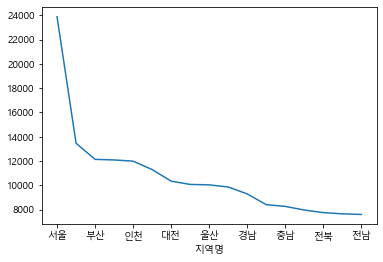

In [38]:
# 지역명으로 분양가격의 평균을 구하고 선그래프로 시각화 합니다.
g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g.plot()

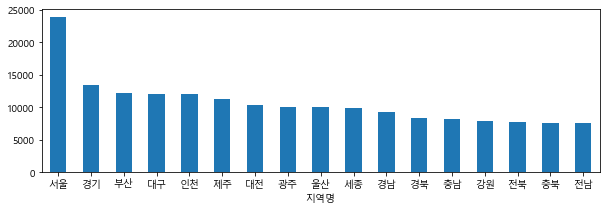

In [39]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
g.plot.bar(rot=0,figsize=(10,3))

* 전용면적별 분양가격의 평균값을 구하고 그래프로 그려봅니다.

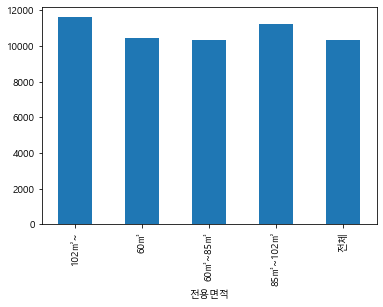

In [40]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar()

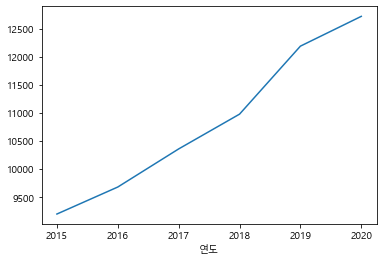

In [41]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

### box-and-whisker plot | diagram

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
* 상자 수염 그림 - 위키백과, 우리 모두의 백과사전
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.

1. 최솟값
2. 제 1사분위수
3. 제 2사분위수( ), 즉 중앙값
4. 제 3 사분위 수( )
5. 최댓값

Box plot 이해하기 :

* 박스 플롯에 대하여 :: -[|]- Box and Whisker
* Understanding Boxplots – Towards Data Science

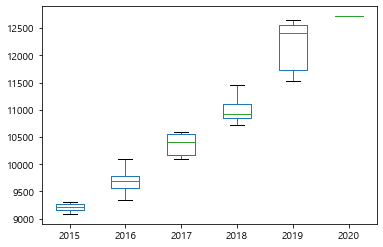

In [42]:
df_last.pivot_table(index="월",columns="연도",values="평당분양가격").plot.box()

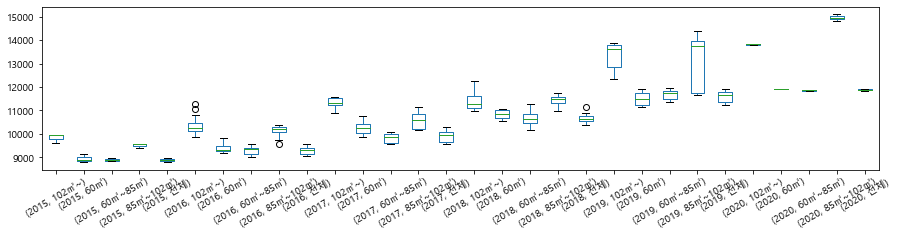

In [43]:
p = df_last.pivot_table(index="월",columns=["연도","전용면적"],values="평당분양가격")
p.plot.box(figsize=(15,3),rot=30)

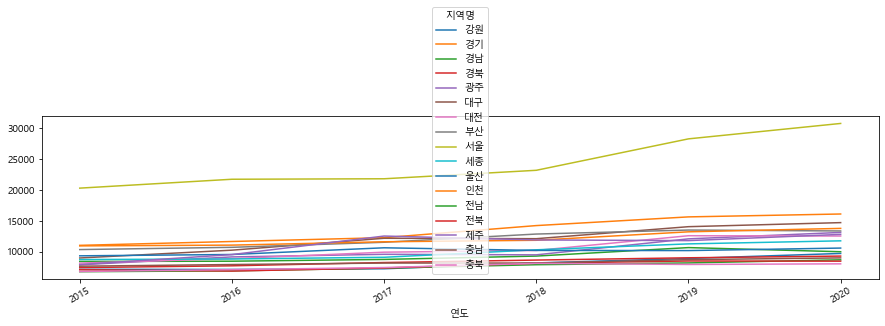

In [44]:
p = df_last.pivot_table(index="연도",columns=["지역명"],values="평당분양가격")
p.plot.line(figsize=(15,3),rot=30)

### Seaborn 으로 시각화 해보기

In [53]:
import seaborn as sns

%matplotlib inline

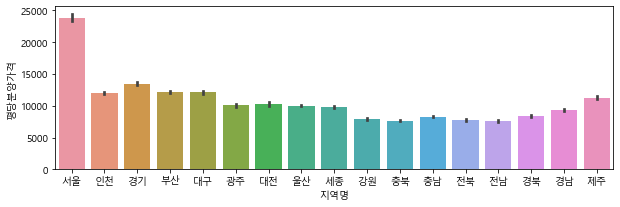

In [62]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(10,3))
sns.barplot(data=df_last,x="지역명",y="평당분양가격")

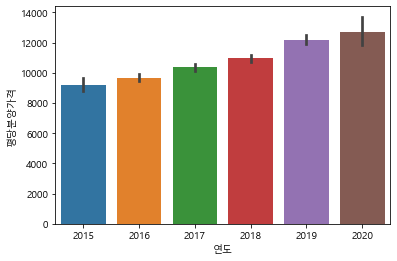

In [63]:
# barplot으로 연도별 평당분양가격을 그려봅니다.

sns.barplot(data=df_last,x="연도",y="평당분양가격")

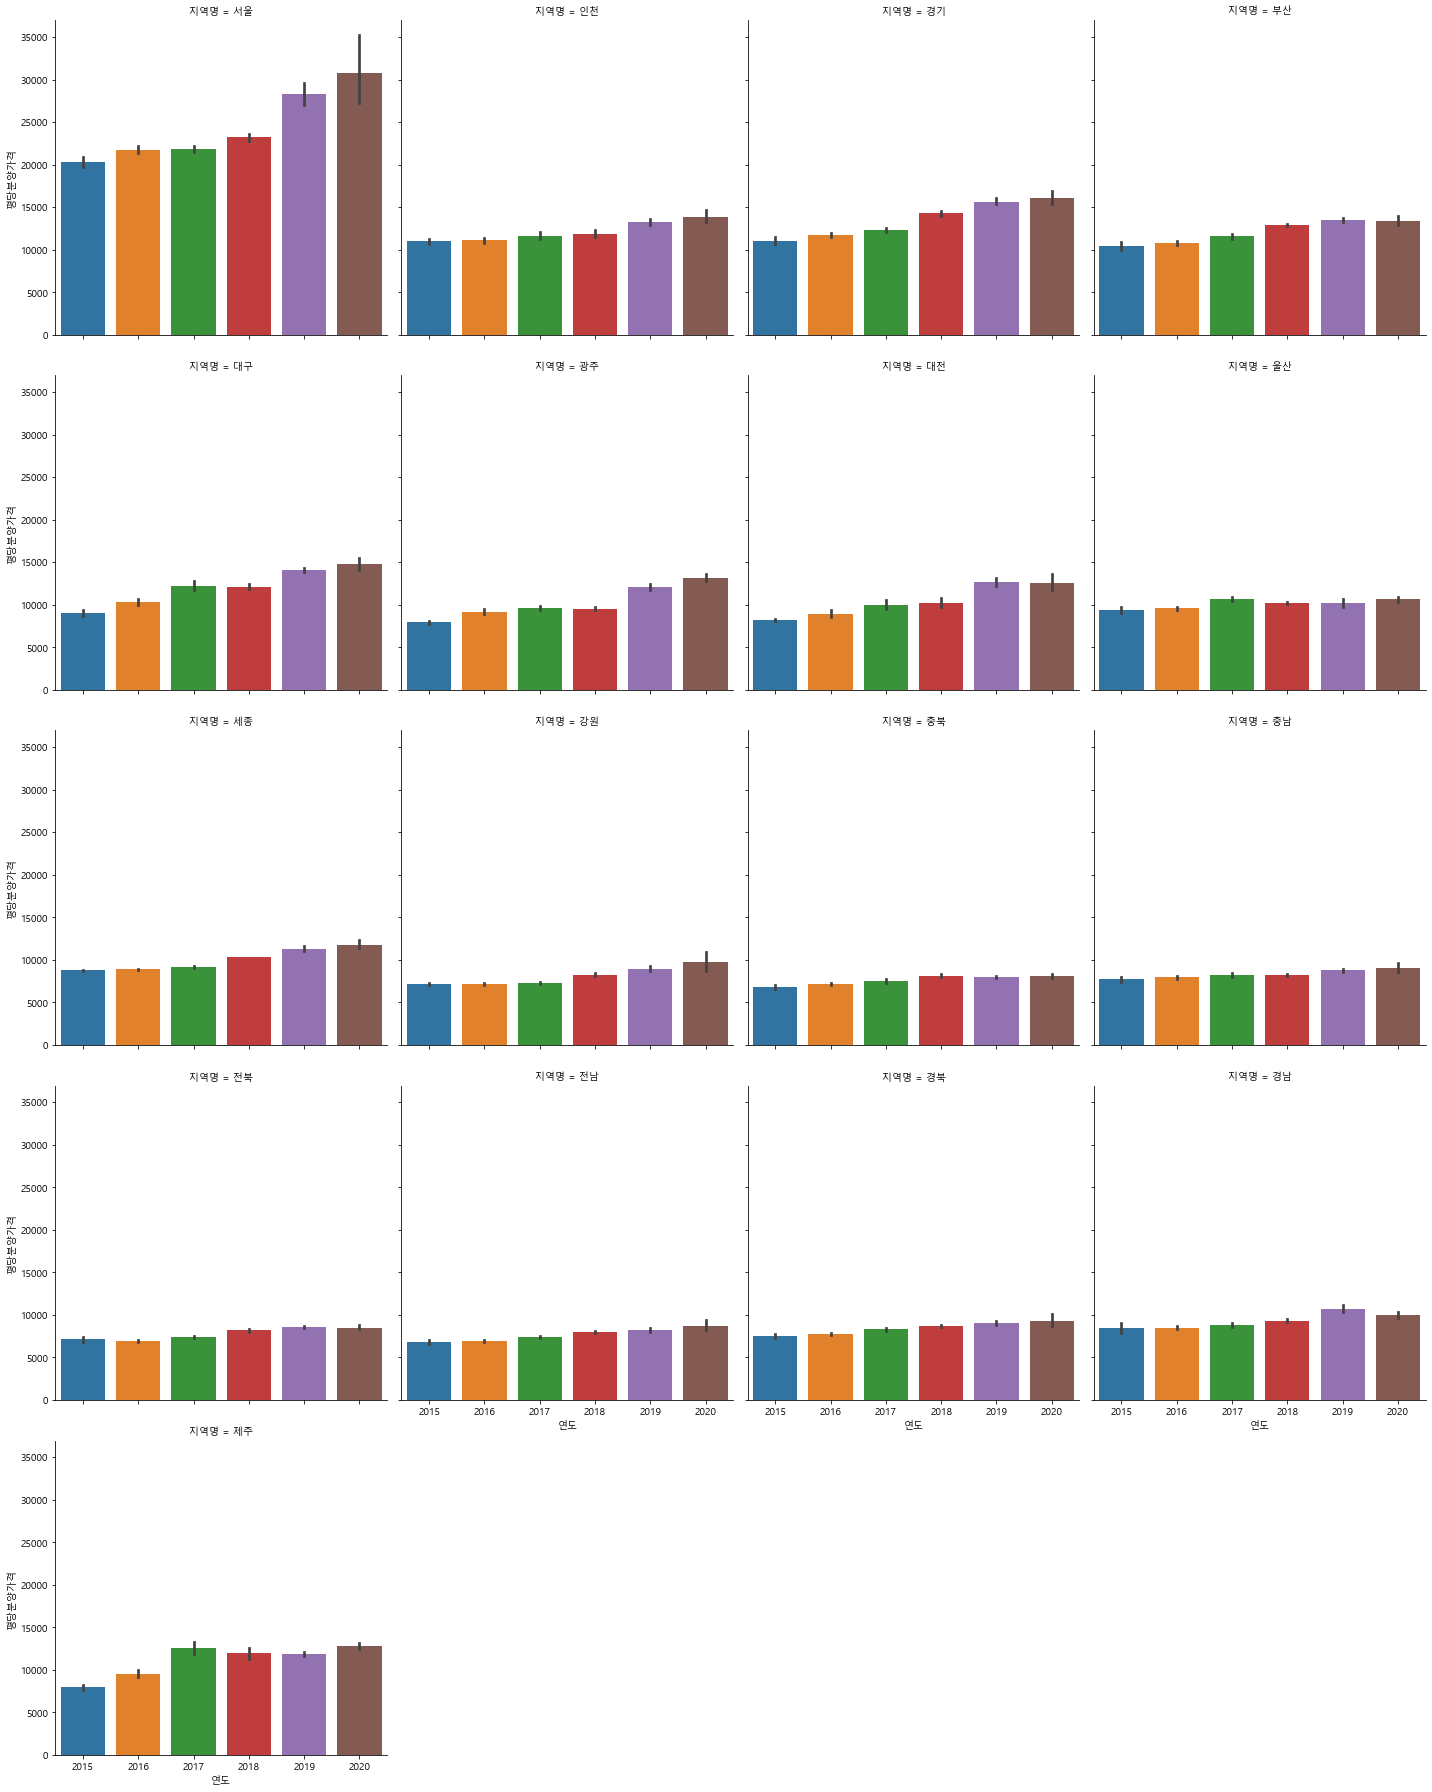

In [78]:
sns.catplot(data=df_last,x="연도",y="평당분양가격",kind="bar",col="지역명",col_wrap=4)

* https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

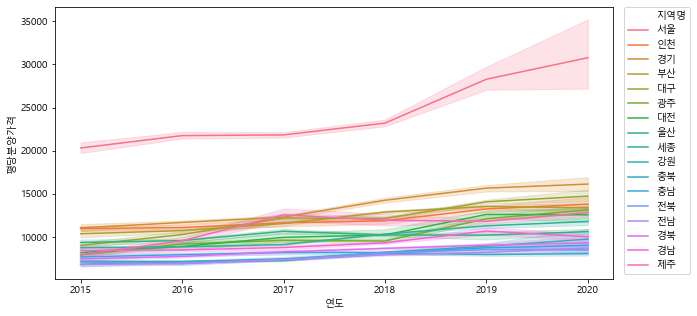

In [70]:
#lineplot으로 연도별 평당분양가격을 그려봅니다.
#hue 옵션을 통해 지역별로 다르게 표시해 봅니다.
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last,x="연도",y="평당분양가격",hue="지역명")
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)

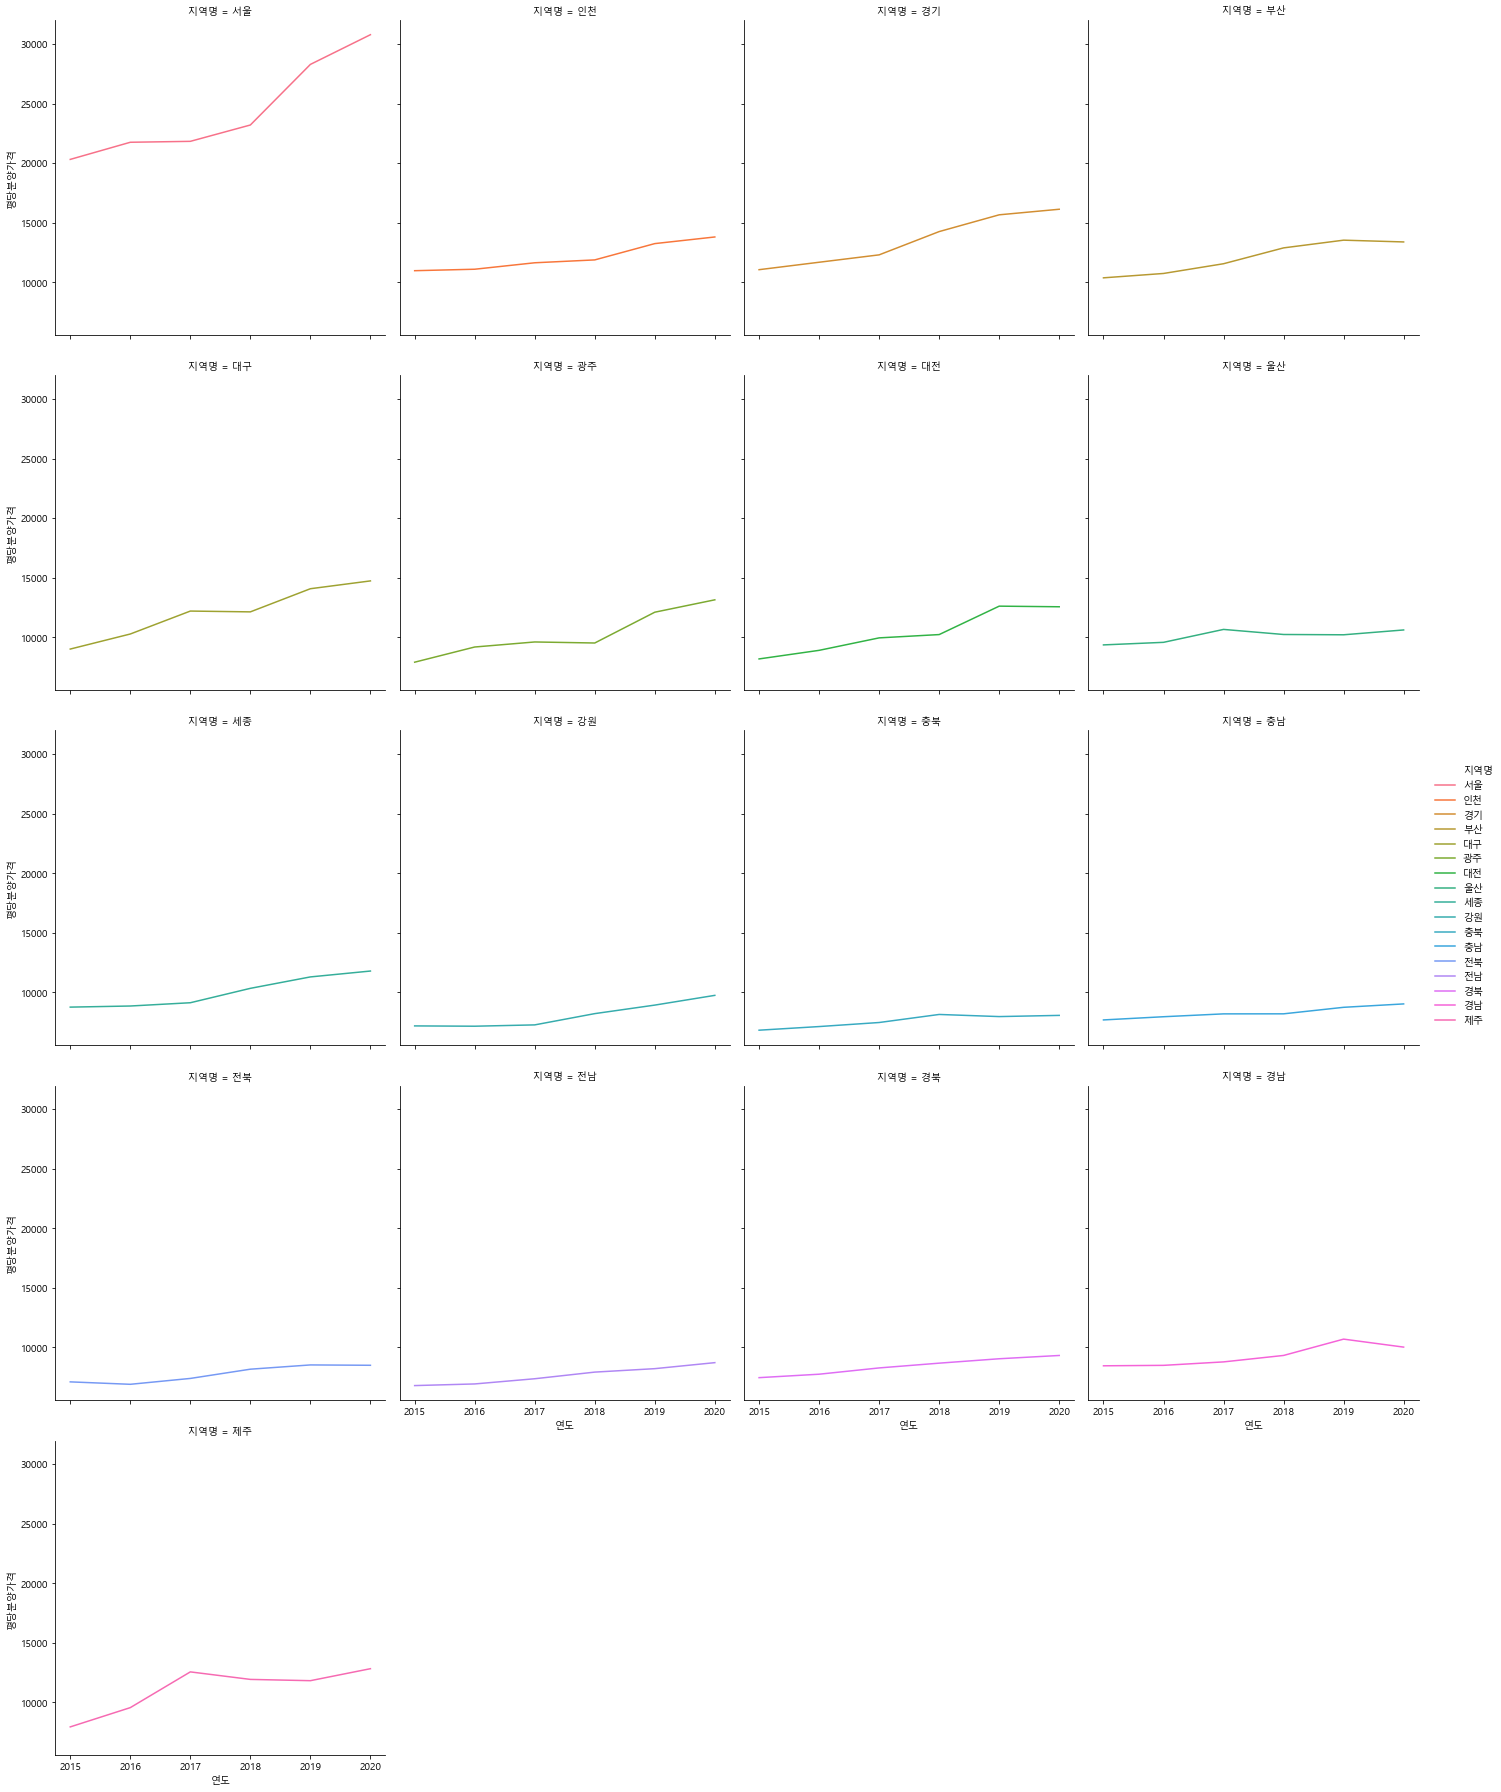

In [76]:
sns.relplot(data=df_last,x="연도",y="평당분양가격",hue="지역명",kind="line",col="지역명",col_wrap=4,ci=None)

### boxplot과 violinplot

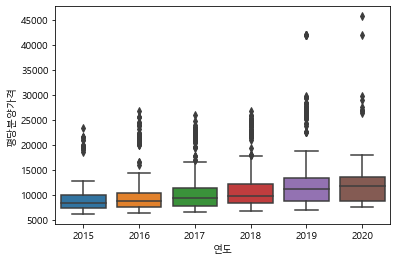

In [82]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.
# 최솟값
# 제 1사분위수
# 제 2사분위수(),즉 중앙값
# 제 3사분위구()
#최댓값

sns.boxplot(data=df_last,x="연도",y="평당분양가격")

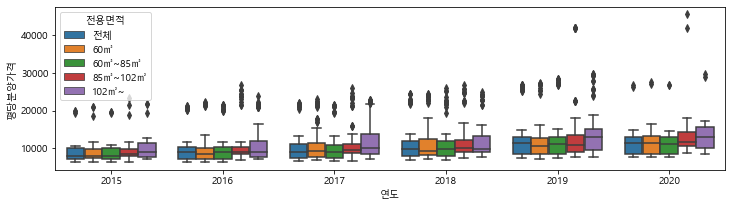

In [83]:
# hue옵션을 주어 전용면적별로 다르게 표시해 봅니다.
plt.figure(figsize=(12,3))
sns.boxplot(data=df_last,x="연도",y="평당분양가격",hue="전용면적")

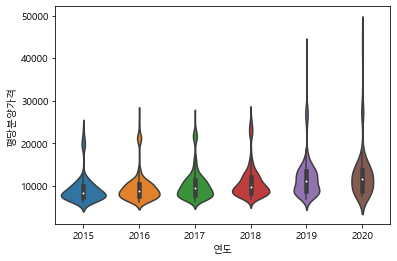

In [86]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.

sns.violinplot(data=df_last,x="연도",y="평당분양가격")